Importing environment, state process function and DQN solver function

In [2]:
# environment and DQN solver
from puckworld import DQNSolver, puckworld

# plotting packages
import pandas as pd
import matplotlib.pyplot as plt

# for state procnessor
from math import atan2, sqrt
import numpy as np

# for saving/loading trained agent
import pickle

# using watermark for reproducibility
%load_ext watermark
%watermark -d -m -v -p numpy,matplotlib,pandas

Using TensorFlow backend.


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-01-31 

CPython 3.7.5
IPython 7.9.0

numpy 1.18.1
matplotlib 3.1.1
pandas 1.0.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


Puck World Implementation

function to convert game state to np array

In [2]:
def process_state(state):
    
    good_range = sqrt((state['player_x'] - state['good_creep_x'])**2 + (state['player_y'] - state['good_creep_y'])**2)
    
    bad_range = sqrt((state['player_x'] - state['bad_creep_x'])**2 + (state['player_y'] - state['bad_creep_y'])**2)
    
    range_vec = np.append(good_range, bad_range) // 1
    
    good_bearing = -atan2((state['good_creep_x'] - state['player_x']), state['good_creep_y']) - (state['player_y'])
    
    bad_bearing = -atan2((state['good_creep_x'] - state['player_x']), (state['good_creep_y']) - (state['player_y']))
    
    bearing_vec = np.append(good_bearing, bad_bearing).round(decimals = 2)
    
    state_vec = np.concatenate([range_vec, bearing_vec])
    
    return state_vec

Training agent

In [3]:
puckworld(process_state = process_state, display = False, solved_score = -15000, solved_runs = 10, max_runs = 100)













Run: 0, exploration: 0.19603963663824134, score: -142550.3893581053


SystemExit: 

/Applications/anaconda3/envs/rl/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Evaluate trained model

In [4]:
with open('solved.model', 'rb') as solved_model:
    
    puckworld_model = pickle.load(solved_model)

    print('loaded: ' + str(puckworld_model))


FileNotFoundError: [Errno 2] No such file or directory: 'solved.model'

In [5]:
puckworld_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


Evaluating trained agent performance

In [10]:
from ple.games.puckworld import PuckWorld
from ple import PLE

game = PuckWorld(width=500, height=500)
p = PLE(game, display_screen=True, state_preprocessor=process_state)
observation_space = p.state_dim[0]
action_space = len(p.getActionSet())

p.init()
nb_frames = 10000
reward = 0.0
rewards = []
for i in range(nb_frames):
    if p.game_over():
        p.reset_game()
    state = np.reshape(p.getGameState(), [1, observation_space])
    agent_action = puckworld_model.act(state)
    action = p.getActionSet()[puckworld_model.act(state)]
    #action = rng.choice([119, 97, 100, 115])
    reward = p.act(action)

SystemExit: 

/Applications/anaconda3/envs/rl/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Plotting rolling average rewards for trained agent

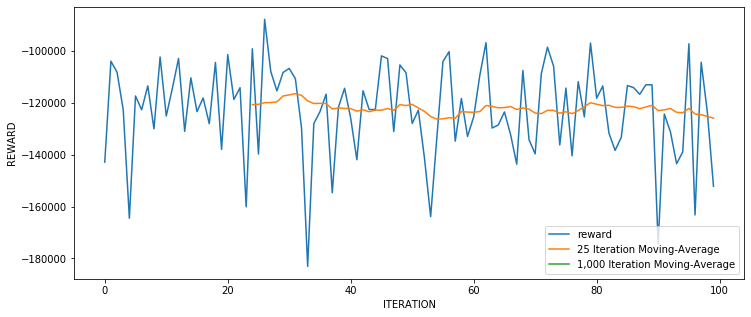

In [5]:
puck_results = pd.read_csv('results.csv')
puck_results['25-MA'] = puck_results['rewards'].rolling(window=25).mean()
puck_results['1000-MA'] = puck_results['rewards'].rolling(window=1000).mean()

plt.figure(figsize=(12,5))
plt.xlabel('ITERATION')
plt.ylabel('REWARD')
plt.plot(puck_results['rewards'], label = 'reward')
plt.plot(puck_results['25-MA'], label = '25 Iteration Moving-Average')
plt.plot(puck_results['1000-MA'], label = '1,000 Iteration Moving-Average')
plt.legend(loc="lower right")
#plt.savefig('./puckworld_3.png')